In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('working-df/cleaned_aviation_data_complete.csv', encoding='latin-1')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87951 entries, 0 to 87950
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event_Id                87951 non-null  object 
 1   Investigation_Type      87951 non-null  object 
 2   Accident_Number         87951 non-null  object 
 3   Event_Date              87951 non-null  object 
 4   Location                87951 non-null  object 
 5   Country                 87951 non-null  object 
 6   Injury_Severity         87951 non-null  object 
 7   Aircraft_damage         87951 non-null  object 
 8   Aircraft_Category       87951 non-null  object 
 9   Registration_Number     87951 non-null  object 
 10  Make                    87951 non-null  object 
 11  Model                   87951 non-null  object 
 12  Amateur_Built           87951 non-null  object 
 13  Number_of_Engines       87951 non-null  object 
 14  Engine_Type             87951 non-null

In [124]:
# in Aircraft_Category for Airplane, what are Total_Fatal_Injuries, and average
df[df['Aircraft_Category'] == 'Airplane'].describe()

,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured
count,72650.000000,72650.000000,72650.000000,72650.000000
mean,0.569525,0.230764,0.301734,5.272939
std,5.051352,1.535354,2.241029,27.465560
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,2.000000
max,295.000000,161.000000,380.000000,699.000000


In [125]:
# Show Aircraft_Category for Make Tupolev
df[df['Make'] == 'Tupolev']

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,...,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date
40281,20020124X00116,Accident,DCA97WA007B,1996-11-12,"New Delhi, India",India,Fatal,Unknown,Unknown,Unknown,...,Unknown,Unknown,349.0,0.0,0.0,0.0,Unknown,Unknown,Foreign,24-01-2002
52174,20020801X01281,Accident,DCA02RA047B,2002-07-01,"Uberlingen, Germany",Germany,Fatal,Destroyed,Unknown,Unknown,...,Unknown,Unknown,71.0,0.0,0.0,0.0,Unknown,Unknown,Foreign,01-08-2002
67070,20100429X00503,Accident,ENG10RA025,2010-04-10,"Smolensk, Russia",Russia,Fatal,Destroyed,Airplane,101,...,Unknown,Unknown,89.0,0.0,0.0,0.0,IMC,Unknown,Unknown,03-11-2020
67981,20101004X40949,Accident,ENG10WA057,2010-09-07,"Izhma, Russia",Russia,Unknown,Destroyed,Unknown,RA-85684,...,Unknown,Unknown,0.0,0.0,0.0,0.0,Unknown,Unknown,Unknown,03-11-2020


In [126]:
# For Tupolev make, change Aircraft_Category 'Airplane'
df.loc[df['Make'] == 'Tupolev', 'Aircraft_Category'] = 'Airplane'

In [127]:
# in Aircraft_Category for Airplane, describe the injuries columns
df[df['Aircraft_Category'] == 'Airplane'].describe()

,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured
count,72653.000000,72653.000000,72653.000000,72653.000000
mean,0.575283,0.230754,0.301722,5.272721
std,5.220573,1.535323,2.240984,27.465014
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,2.000000
max,349.000000,161.000000,380.000000,699.000000


In [128]:
incidents_airplane = df[df['Aircraft_Category'] == 'Airplane']

In [129]:
# For airplane incidents, how many were destroyed, had minor damage or substantial damage
incidents_airplane['Aircraft_damage'].value_counts()

Aircraft_damage
Substantial    52986
Destroyed      14749
Unknown         2597
Minor           2321
Name: count, dtype: int64

In [133]:
# Sums of different injury categories for airplanes
fatalities_airplane = incidents_airplane['Total_Fatal_Injuries'].sum()
serious_injury_airplane = incidents_airplane['Total_Serious_Injuries'].sum()
minor_injury_airplane = incidents_airplane['Total_Minor_Injuries'].sum()
no_injury_airplane = incidents_airplane['Total_Uninjured'].sum()
airplane_people_total = fatalities_airplane + serious_injury_airplane + minor_injury_airplane + no_injury_airplane

airplane_people_total

463561.0

In [88]:
substantial_damage_airplane = incidents_airplane[incidents_airplane['Aircraft_damage'] == 'Substantial'].shape[0]
minor_damage_airplane = incidents_airplane[incidents_airplane['Aircraft_damage'] == 'Minor'].shape[0]
destroyed_airplane = incidents_airplane[incidents_airplane['Aircraft_damage'] == 'Destroyed'].shape[0]

In [89]:
#fatalities in the damage subsets
fatalities_substantial_damage_airplane = incidents_airplane[incidents_airplane['Aircraft_damage'] == 'Substantial']['Total_Fatal_Injuries'].sum()
fatalities_minor_damage_airplane = incidents_airplane[incidents_airplane['Aircraft_damage'] == 'Minor']['Total_Fatal_Injuries'].sum()
fatalities_destroyed_airplane = incidents_airplane[incidents_airplane['Aircraft_damage'] == 'Destroyed']['Total_Fatal_Injuries'].sum()

In [90]:
# what percentage of incidents_airplane is no_injury_airplane
no_injury_airplane_percent = no_injury_airplane / airplane_people_total * 100
fatalities_airplane_percent = fatalities_airplane / airplane_people_total * 100
serious_injury_airplane_percent = serious_injury_airplane / airplane_people_total * 100
minor_injury_airplane_percent = minor_injury_airplane / airplane_people_total * 100

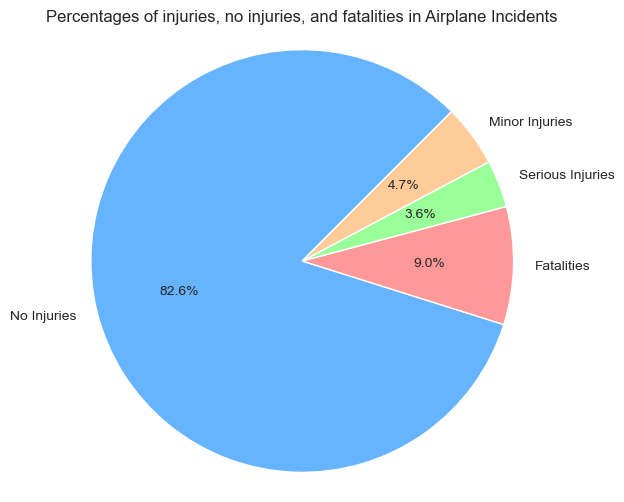

In [135]:
# Create pie chart with injury percentages
labels = ['No Injuries', 'Fatalities', 'Serious Injuries', 'Minor Injuries']
sizes = [no_injury_airplane_percent, fatalities_airplane_percent, serious_injury_airplane_percent, minor_injury_airplane_percent]
colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99']
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=45)
plt.axis('equal')
plt.title('Percentages of injuries, no injuries, and fatalities in Airplane Incidents')
plt.show()

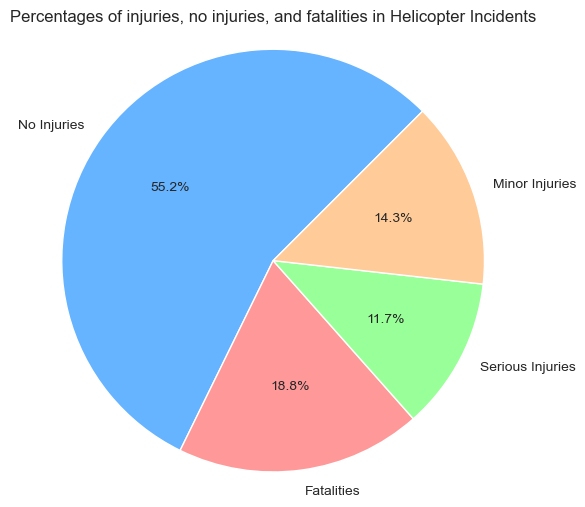

In [141]:
incidents_helicopter = df[df['Aircraft_Category'] == 'Helicopter']
# Sums of different injury categories for airplanes
fatalities_helicopter = incidents_helicopter['Total_Fatal_Injuries'].sum()
serious_injury_helicopter = incidents_helicopter['Total_Serious_Injuries'].sum()
minor_injury_helicopter = incidents_helicopter['Total_Minor_Injuries'].sum()
no_injury_helicopter = incidents_helicopter['Total_Uninjured'].sum()
helicopter_people_total = fatalities_helicopter + serious_injury_helicopter + minor_injury_helicopter + no_injury_helicopter

substantial_damage_helicopter = incidents_helicopter[incidents_helicopter['Aircraft_damage'] == 'Substantial'].shape[0]
minor_damage_helicopter = incidents_helicopter[incidents_helicopter['Aircraft_damage'] == 'Minor'].shape[0]
destroyed_helicopter = incidents_helicopter[incidents_helicopter['Aircraft_damage'] == 'Destroyed'].shape[0]

#fatalities in the damage subsets
fatalities_substantial_damage_helicopter = incidents_helicopter[incidents_helicopter['Aircraft_damage'] == 'Substantial']['Total_Fatal_Injuries'].sum()
fatalities_minor_damage_helicopter = incidents_helicopter[incidents_helicopter['Aircraft_damage'] == 'Minor']['Total_Fatal_Injuries'].sum()
fatalities_destroyed_helicopter = incidents_helicopter[incidents_helicopter['Aircraft_damage'] == 'Destroyed']['Total_Fatal_Injuries'].sum()

# percentages of incidents_helicopter in the injury column
no_injury_helicopter_percent = no_injury_helicopter / helicopter_people_total * 100
fatalities_helicopter_percent = fatalities_helicopter / helicopter_people_total * 100
serious_injury_helicopter_percent = serious_injury_helicopter / helicopter_people_total * 100
minor_injury_helicopter_percent = minor_injury_helicopter / helicopter_people_total * 100

# Create pie chart with injury percentages
labels = ['No Injuries', 'Fatalities', 'Serious Injuries', 'Minor Injuries']
sizes = [no_injury_helicopter_percent, fatalities_helicopter_percent, serious_injury_helicopter_percent, minor_injury_helicopter_percent]
colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99']
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=45)
plt.axis('equal')
plt.title('Percentages of injuries, no injuries, and fatalities in Helicopter Incidents')
plt.show()

In [140]:
helicopter_people_total

19012.0

In [107]:
df['Report_Status'].value_counts()

Report_Status
Probable Cause                                                                                                                                                       60867
Unknown                                                                                                                                                               6364
Foreign                                                                                                                                                               1974
<br /><br />                                                                                                                                                           167
Factual                                                                                                                                                                145
                                                                                                                                   

In [106]:
# create a subset of rows that is called informative_report that removes probable cause, unknown, foreign, factual, and any other non-useful values

informative_report = df[df['Report_Status'] != 'Probable Cause']
informative_report = informative_report[informative_report['Report_Status'] != 'Unknown']
informative_report = informative_report[informative_report['Report_Status'] != 'Foreign']
informative_report = informative_report[informative_report['Report_Status'] != '<br /><br />']
informative_report = informative_report[informative_report['Report_Status'] != 'Factual']
informative_report = informative_report[informative_report['Report_Status'] != 'None.']
informative_report = informative_report[informative_report['Report_Status'] != '.']
informative_report = informative_report[informative_report['Report_Status'] != 'Preliminary']
informative_report = informative_report[informative_report['Report_Status'] != 'Undetermined.']

informative_report['Report_Status'].info()

<class 'pandas.core.series.Series'>
Index: 18380 entries, 63001 to 87833
Series name: Report_Status
Non-Null Count  Dtype 
--------------  ----- 
18380 non-null  object
dtypes: object(1)
memory usage: 287.2+ KB


In [110]:
# In informative_report, replace "pilotÃÂÃÂÃÂÃÂs" with "pilot's"
informative_report['Report_Status'] = informative_report['Report_Status'].str.replace('pilotÃÂÃÂÃÂÃÂs', "pilot's")

informative_report['Report_Status'].value_counts()

Report_Status
The pilot's failure to maintain directional control during the landing roll.                                                                                                                                                                                                                               75
The pilot's failure to maintain directional control during landing.                                                                                                                                                                                                                                        60
A loss of engine power for undetermined reasons.                                                                                                                                                                                                                                                           52
A total loss of engine power for undetermined reasons.                          

In [109]:
# create subset of rows named pilot_error that contain the word "pilot's" in the Report_Status column
pilot_error = informative_report[informative_report['Report_Status'].str.contains("pilot's")]

pilot_error['Report_Status'].info()

<class 'pandas.core.series.Series'>
Index: 12414 entries, 63001 to 87833
Series name: Report_Status
Non-Null Count  Dtype 
--------------  ----- 
12414 non-null  object
dtypes: object(1)
memory usage: 194.0+ KB


In [111]:
# What percentage of all the records are pilot_error
pilot_error.shape[0] / df.shape[0] * 100

14.114677490875602

In [112]:
# non_pilot_report is informative_report without the pilot_error results
non_pilot_report = informative_report[~informative_report.index.isin(pilot_error.index)]

non_pilot_report['Report_Status'].info()

<class 'pandas.core.series.Series'>
Index: 5966 entries, 63005 to 87727
Series name: Report_Status
Non-Null Count  Dtype 
--------------  ----- 
5966 non-null   object
dtypes: object(1)
memory usage: 93.2+ KB


In [113]:
# What percentage of all the records are non_pilot_error
non_pilot_report.shape[0] / df.shape[0] * 100

6.783322531864333

In [114]:
# What percentage of the informative records are non_pilot_error and pilot_error
print(non_pilot_report.shape[0] / informative_report.shape[0] * 100)
print(pilot_error.shape[0] / informative_report.shape[0] * 100)

32.45919477693145
67.54080522306856


Report Status
This previous section demonstrates that the vast majority of the report status column is not informative, having values such as "Probable Cause", "Foreign", and "Unknown". About 14% of the records (12,414) indicate pilot error as the main cause of the incident. Another 6.8% (5,966) contain a variety of causes for the incident, most of which point to mechanical or equipment issues. 

So of these 18,380 informative values for Report Status, almost 68% are attributed to pilot error and about 32.5% attributed to various mechanical or equipment failures, many due to undetermined causes and some caused by human error in maintenance of equipment.

My takeaway from this section highlights the requirement of an airplane to insure the proper training and continueing oversight and education of its pilots and maintenance staff in order to reduce the frequency of human error in the operation and maintenance of its aviation equipment.

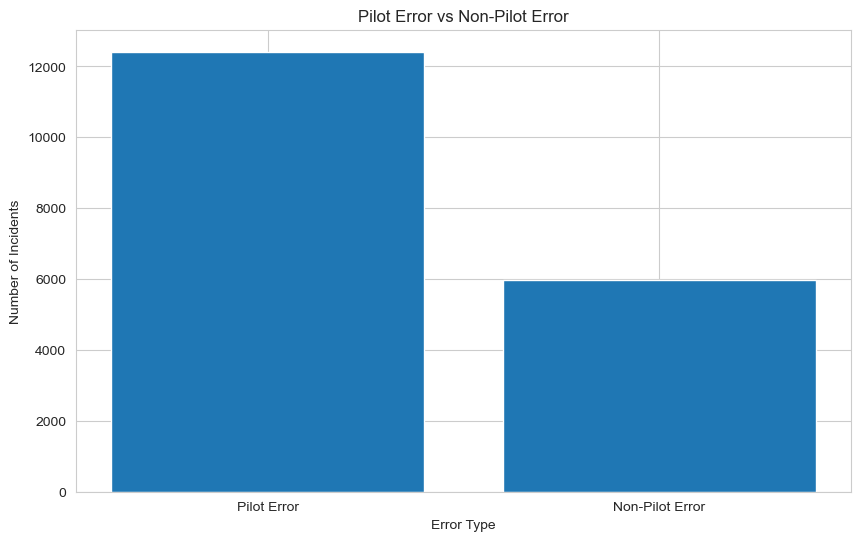

In [142]:
# create bar chart for pilot_error.shape and non_pilot_error.shape
plt.figure(figsize=(10, 6))
plt.bar(['Pilot Error', 'Non-Pilot Error'], [pilot_error.shape[0], non_pilot_report.shape[0]])
plt.title('Pilot Error vs Non-Pilot Error')
plt.xlabel('Error Type')
plt.ylabel('Number of Incidents')
plt.show()

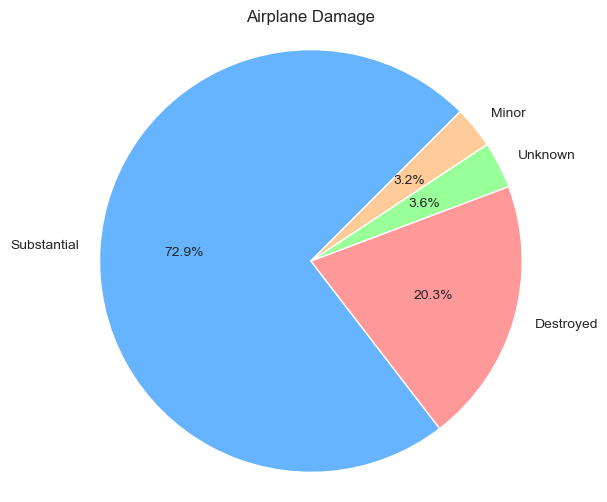

In [116]:
# create a pie chart showing airplane and damage percentage and numbers
airplane_damage = incidents_airplane['Aircraft_damage'].value_counts()
labels = airplane_damage.index
sizes = airplane_damage
colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99']
explode = (0, 0, 0)
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=45)
plt.axis('equal')
plt.title('Airplane Damage')
plt.show()

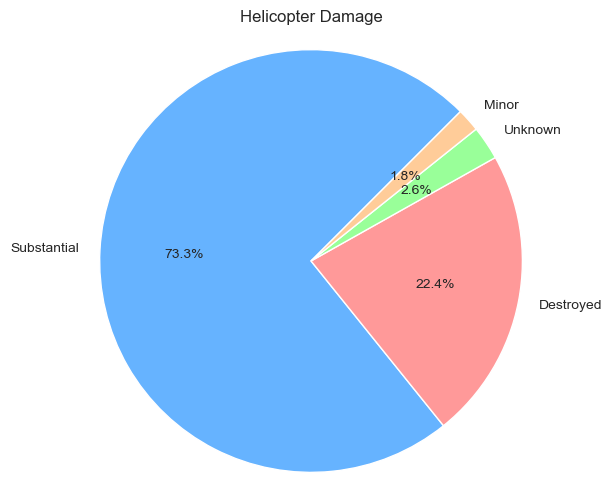

In [117]:
# create a pie chart showing helicopters and damage percentage and numbers
helicopter_damage = incidents_helicopter['Aircraft_damage'].value_counts()
labels = helicopter_damage.index
sizes = helicopter_damage
colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99']
explode = (0, 0, 0)
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=45)
plt.axis('equal')
plt.title('Helicopter Damage')
plt.show()

In [118]:
helicopter_damage

Aircraft_damage
Substantial    5836
Destroyed      1781
Unknown         206
Minor           141
Name: count, dtype: int64

In [120]:
incidents_helicopter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7964 entries, 16 to 87936
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event_Id                7964 non-null   object 
 1   Investigation_Type      7964 non-null   object 
 2   Accident_Number         7964 non-null   object 
 3   Event_Date              7964 non-null   object 
 4   Location                7964 non-null   object 
 5   Country                 7964 non-null   object 
 6   Injury_Severity         7964 non-null   object 
 7   Aircraft_damage         7964 non-null   object 
 8   Aircraft_Category       7964 non-null   object 
 9   Registration_Number     7964 non-null   object 
 10  Make                    7964 non-null   object 
 11  Model                   7964 non-null   object 
 12  Amateur_Built           7964 non-null   object 
 13  Number_of_Engines       7964 non-null   object 
 14  Engine_Type             7964 non-null   obj

In [148]:
df['Model'].value_counts()

Model
152           2313
172           1743
172N          1144
PA-28-140      925
150            820
              ... 
LL-8-A           1
SGS 135          1
T-210-N          1
VMAX PROBE       1
M-8 EAGLE        1
Name: count, Length: 12233, dtype: int64